# HW Assignment 3
    01/27/15
    Alexey Gilman
    CSE599
    
The purpose of this assigment is to create a follow along document that demonstrates how Ipython notebook is used in conjucntion with data processes packages such as pandas, pandas, matplotlib. We will also utilize widgets as an example of how these tools can be used quickly change parameters. 

In this assignment we will explore pronto data and answer several questions:
    - How does temperature and rain events affect overall pronto riders? Similar to HW2 but now I want to see if this trend is identical across genders and member types or if one gender/account type is less affected by weather. 
        - Does temperature events have a more significant effect on male or female? by months?
        - Does tmperature and rain events have a more significant effect on members or one-time users? by months 
        - Does temperature and rain events have a significant effect on trip duration? by months?

Firstly, we need to import all the modules that we will use, and setup our workspace. Start with importing all familiar modules like numpy and pandas. 

In [1]:
import pandas as pd
import numpy as np 
from ipywidgets import interact
import matplotlib as plt
%matplotlib inline 

In [2]:
cd /Users/alexeygilman/gilmanSEDS/Gilman/Project_HW3/data

/Users/alexeygilman/gilmanSEDS/Gilman/Project_HW3/data


In [3]:
trip_data = pd.read_csv("2015_trip_data.csv")
wthr_data = pd.read_csv("2015_weather_data.csv")

#uncomment the lines below when github isnt down, it will pull the data directly from my repository :) 

#trip_data = pd.read_csv("https://raw.githubusercontent.com/UWSEDS/Gilman/master/Project_HW3/data/2015_trip_data.csv?token=AIdPxHjLbKYupMgaZABXlCA51NkNh6TZks5WspcgwA%3D%3D")
#wthr_data = pd.read_csv("https://raw.githubusercontent.com/UWSEDS/Gilman/master/Project_HW3/data/2015_weather_data.csv?token=AIdPxPT_TcN39HI79Kl02sFtFM14-HDGks5WspeWwA%3D%3D")

Lets have a look at what these dataframes look like... 

In [4]:
trip_data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970


In [5]:
wthr_data.head(2)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain


Good, we can see now that one dataset has only dates and another has times for each rider. It would be nice merge these datasets on the same index of date. Firs our purposes we only care about the total number of riders, lets sum all riders by gender and make a new columns for total_sum, total_male, total_female, total_member, total_guest. 

In [6]:
dates_trip = pd.DatetimeIndex(trip_data['starttime']).normalize()   
#normalizing the data format, the default does not include time, so it will normalize it to a date only. 

trip_data["dates"] = dates_trip

In [7]:
wthr_data["Date"] = pd.DatetimeIndex(wthr_data["Date"]).normalize()

#normalized the weather data in one line since im learning 

OK, Now lets do some grouping... the .groupby function is great. Lets count of all the riders of each gender for each day of the year. 

In [8]:
trip_data_grouped = trip_data.groupby(["dates", "gender"])["trip_id"].count()

#notice that since we are just filtering first by date and then by each gender,
#and then counting the number of occurances, it doesnt really matter which column data we count. 

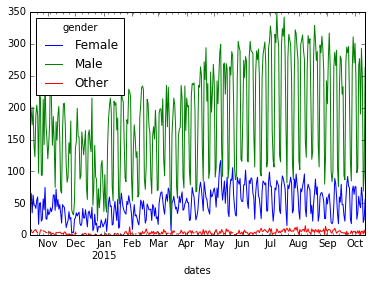

In [9]:
#unstacking it, just regrouped it into a dataframe. Lets unstack and have a quick glance. 
trip_data_grouped_gender = trip_data_grouped.unstack()
trip_data_grouped_gender.plot()

Cool, Now lets do the same thing for the type of data and the trip duration that we have and finally merge them together. 

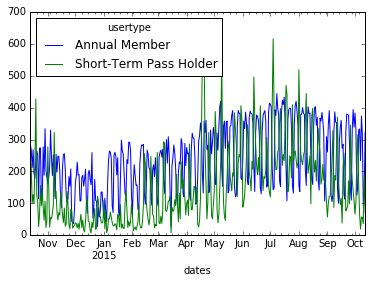

In [10]:
trip_data_grouped_type = trip_data.groupby(["dates", "usertype"])["trip_id"].count()
trip_data_grouped_type = trip_data_grouped_type.unstack()
trip_data_grouped_type.plot()

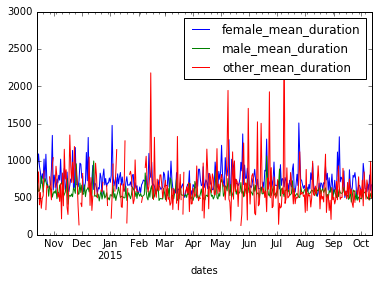

In [11]:
trip_data_grouped_duration  = trip_data.groupby(["dates","gender"])["tripduration"].mean()
trip_data_grouped_duration = trip_data_grouped_duration.unstack()
trip_data_grouped_duration.columns = ["female_mean_duration","male_mean_duration","other_mean_duration"]
trip_data_grouped_duration.plot()

OK, now we average trip duration per day for each gender, we have counts per day for each user type, and we have counts per day for each gender. Lets merge all this together and see what kind of interactive things we can do with this. 

In [12]:
joined_a = trip_data_grouped_gender.join(trip_data_grouped_type, how = "inner")

In [13]:
joined_b = joined_a.join(trip_data_grouped_duration, how = "inner")

In [14]:
joined_b["female_mean_duration"] = joined_b["female_mean_duration"]/60
joined_b["male_mean_duration"] = joined_b["male_mean_duration"]/60
joined_b["other_mean_duration"] = joined_b["other_mean_duration"]/60

In [15]:
wthr_data_indexed = wthr_data.set_index(["Date"])

In [16]:
joined_c = joined_b.join(wthr_data_indexed, how = "inner")

In [17]:
joined_c.head(2)

,Female,Male,Other,Annual Member,Short-Term Pass Holder,female_mean_duration,male_mean_duration,other_mean_duration,Max_Temperature_F,Mean_Temperature_F,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
2014-10-13,67,207,10,284,125,12.501651,14.335879,18.576082,71,62,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,65,195,8,268,223,15.938859,11.986858,11.543488,63,59,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain


<function __main__.plot_male_duration_and_temp>

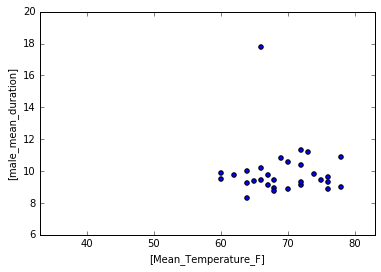

In [18]:
#Mission statement: Want to plot male_trip_duration vs temperature on the X axis and toggle/widget between months. 

def plot_male_duration_and_temp(month): 
    times = pd.DatetimeIndex(joined_c.index)
    
    new_df = joined_c[times.month == int(month)]
    
    array = {joined_c["Mean_Temperature_F"].min(),joined_c["Mean_Temperature_F"].max()}  #to fix the x-axis on the plot
    
    new_df.plot.scatter(["Mean_Temperature_F"], ["male_mean_duration"],xlim = array)
    
    
interact(plot_male_duration_and_temp, month = [1,12])

In [19]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

<function __main__.plot_male_duration_and_temp>

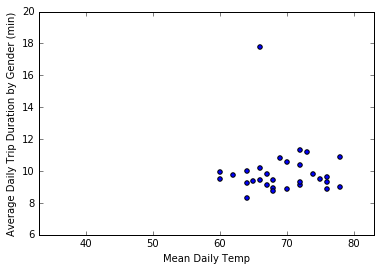

In [20]:
#Mission statement: Want to plot male_trip_duration vs temperature on the X axis and toggle/widget between months.

def plot_male_duration_and_temp(month, gender): 
    times = pd.DatetimeIndex(joined_c.index)
    
    new_df = joined_c[times.month == int(month)]
    
    x_lim = {joined_c["Mean_Temperature_F"].min(), joined_c["Mean_Temperature_F"].max()}  #to fix the x-axis on the plot
    
    plt_counts = new_df.plot.scatter(x = "Mean_Temperature_F", y = gender, xlim = x_lim) #ylim = {26,6}) # xlim = array)
    
    plt_counts.set_xlabel("Mean Daily Temp")
    plt_counts.set_ylabel("Average Daily Trip Duration by Gender (min)")
    
interact(plot_male_duration_and_temp, month = [1,12], gender = ["male_mean_duration", "female_mean_duration"])


OK now lets see if total counts of members and total counts of guests varies much with temperature... 

<function __main__.plot_counts_and_temp>

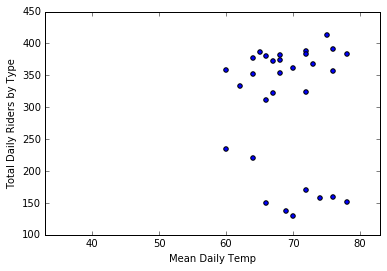

In [21]:

def plot_counts_and_temp(month, user): 
    times = pd.DatetimeIndex(joined_c.index)
    
    new_df1 = joined_c[times.month == int(month)]
    
    x_lim = {joined_c["Mean_Temperature_F"].min(), joined_c["Mean_Temperature_F"].max()}  #to fix the x-axis on the plot
    
    plt_counts = new_df1.plot.scatter(x = "Mean_Temperature_F", y = user, xlim = x_lim) #ylim = {26,6}) # xlim = array)
    
    plt_counts.set_xlabel("Mean Daily Temp")
    plt_counts.set_ylabel("Total Daily Riders by Type")
    
    
interact(plot_counts_and_temp, month = [1,12], user = ["Annual Member", "Short-Term Pass Holder"])



Lets Try this again but with either male or female total daily counts plottted against temperature. 

<function __main__.plot_counts_gender_and_temp>

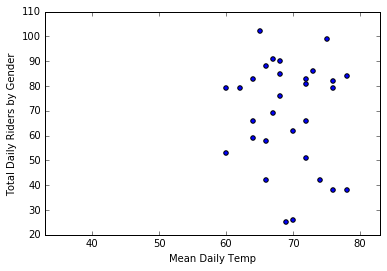

In [22]:
def plot_counts_gender_and_temp(month, gender): 
    times = pd.DatetimeIndex(joined_c.index)
    
    new_df2 = joined_c[times.month == int(month)]
    
    x_lim = {joined_c["Mean_Temperature_F"].min(), joined_c["Mean_Temperature_F"].max()}  #to fix the x-axis on the plot
    
    plt_counts = new_df2.plot.scatter(x = "Mean_Temperature_F", y = gender, xlim = x_lim)
    
    plt_counts.set_xlabel("Mean Daily Temp")
    plt_counts.set_ylabel("Total Daily Riders by Gender")
    
interact(plot_counts_gender_and_temp , month = [1,12], gender = ["Female", "Male"])



# OK, so what did I learn and practice? 

    - Effective work techniques:
        - Keyboard shortcuts for "Markdown", "Code", inserting cells above and below present cell
        - learned to read_csv directly from a git repository url... this is great for reproducibility... (unless git is down)
        - got to better understand the .groupby feature, how to set index with different dataframes in order to later join them together. 
        - learned to frequently restart kernel to make sure all the cells work... my first 2 HW assignment were in dissarey.
        - learned about the interact widget and how it is useful for interactive comparison and data exploration. I wonder if it is easy to export plots after finding an interesting slider setting. 
        - This was fun after getting over some newbie frustration :)